# **GALAH Clustering in Lower Dimensional Space**
---

- Shown by the success of GMM applied to lower dimensional space in `Notebook_4` we further investigate the success of this approach by investigating the corrosponding higher dimensional parameeter distributions.

---


- If rerunning this pipeline with `rerun_GMM = True` its means the colours and labelling of the clusters will be offset and thus not neccesarily matched as this is dependent on random initialisations - so although the results are the same the colours and labels may not match.
- Overall the results will be the same

In [55]:
from analysis import ReducedGMMPipeline
from astropy.table import Table
import numpy as np

# Avoid warnings from umap for cleaner output
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# The follow data:
# 1. Includes the relavent data for the analysis which will be converted to lower dimensionality
# 2. Includes the assigments given in the high dimensional space XD analysis, this is purely to show the comparison of clustering results
galah_assigned_data_path = 'XD_Results/Galah_postGMM/galah_GMM_scaled_Gauss5_results.fits'
galah_postXD = Table.read(galah_assigned_data_path, format='fits')

# The follow data keys are incorprated into the analysis:
galah_data_keys = ['fe_h', 'alpha_fe', 'Na_fe', 'Al_fe', 'Mn_fe', 'Y_fe', 'Ba_fe', 'Eu_fe', 'Mg_Cu', 'Mg_Mn', 'Ba_Eu', 'Energy']
# Error Keys - These will be used during deconvoltion of the error matrix
galah_data_error_keys = ['e_fe_h', 'e_alpha_fe', 'e_Na_fe', 'e_Al_fe', 'e_Mn_fe', 'e_Y_fe', 'e_Ba_fe', 'e_Eu_fe', 'e_Mg_Cu', 'e_Mg_Mn', 'e_Ba_Eu', 'e_Energy']

In [57]:
# This reruns the GMM analysis on the data, if False it will use the previous saved results:
rerun_GMM = False

In [ ]:
# Initalise the pipeline with the following UMAP
pipeline = ReducedGMMPipeline(galah_postXD, galah_data_keys, umap_dimensions = 2, umap_n_neighbors = 15, umap_min_dist = 0.0)
# Simply ensure the UMAP projection is constant if not rerunning the GMM
if not rerun_GMM:
    pipeline.umap_data = np.load("XD_Results/Galah/galah_umap_space_8_6.npy")

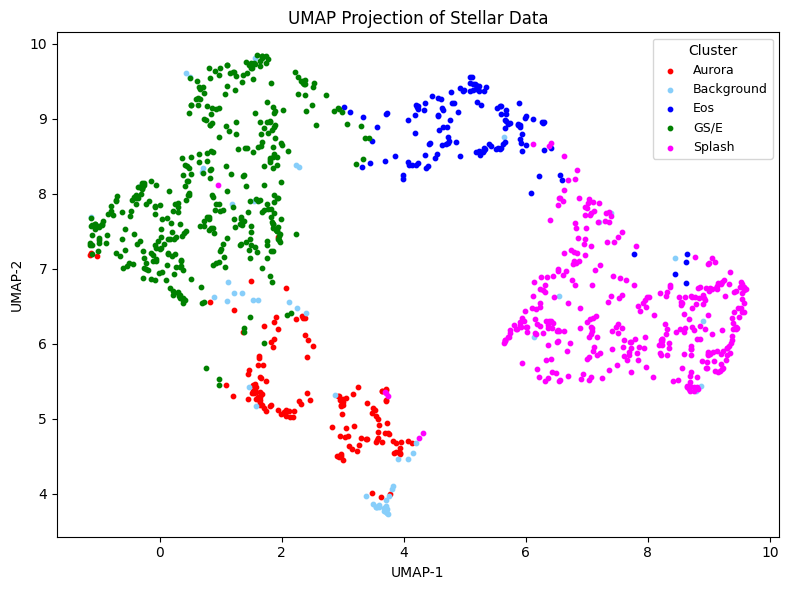

In [59]:
# This is simply a mapping from the high dimensional clusters to their name
labels_name = {
    4: "GS/E",
    2: "Splash",
    1: "Aurora",
    5: "Eos",
    3: "Background",
}
# And the corrosponding colours for the clusters
labels_color_map = {
    "GS/E": "green",
    "Splash": "magenta",
    "Aurora": "red",
    "Eos": "blue",
    "Background": "lightskyblue"
}

# This will demonstarate the lower dimensional space and the higher dimensional clusters:
pipeline.display_umap( label_dict = labels_name, colour_dict = labels_color_map ) 

In [60]:
# This will run the GMM fitting across multiple initialisation on the lower diemnsional dataset, this is not typically re-run to allow for fast reproduction
# It also allows constant colors and assignment to be demonstated 
if rerun_GMM:
    pipeline.run_GMM(gauss_component_range = (1, 10), n_init = 300, save_path = 'XD_Results/Galah/gallah_reducedGMM_8_6.pkl')

Best BIC Score: 7547.7211
  - Components: 10
 The following filters were applied: {'n_gauss': 4}
 Best BIC Score from filtered inputs: 7885.4374 occurred at:
   - Gaussian Components (n_gauss): 4

Model Fit Summary:
+----+-----------+---------+---------+------------------+
|    |   n_gauss |     BIC |     AIC |   log_likelihood |
|----+-----------+---------+---------+------------------|
|  0 |         1 | 9181.08 | 9156.24 |         -4573.12 |
|  1 |         2 | 8547.03 | 8492.39 |         -4235.2  |
|  2 |         3 | 8141.81 | 8057.37 |         -4011.69 |
|  3 |         4 | 7885.44 | 7771.2  |         -3862.6  |
|  4 |         5 | 7760.76 | 7616.72 |         -3779.36 |
|  5 |         6 | 7684.85 | 7511    |         -3720.5  |
|  6 |         7 | 7631.91 | 7428.26 |         -3673.13 |
|  7 |         8 | 7591.61 | 7358.17 |         -3632.08 |
|  8 |         9 | 7561.31 | 7298.06 |         -3596.03 |
|  9 |        10 | 7547.72 | 7254.67 |         -3568.34 |
+----+-----------+---------+--

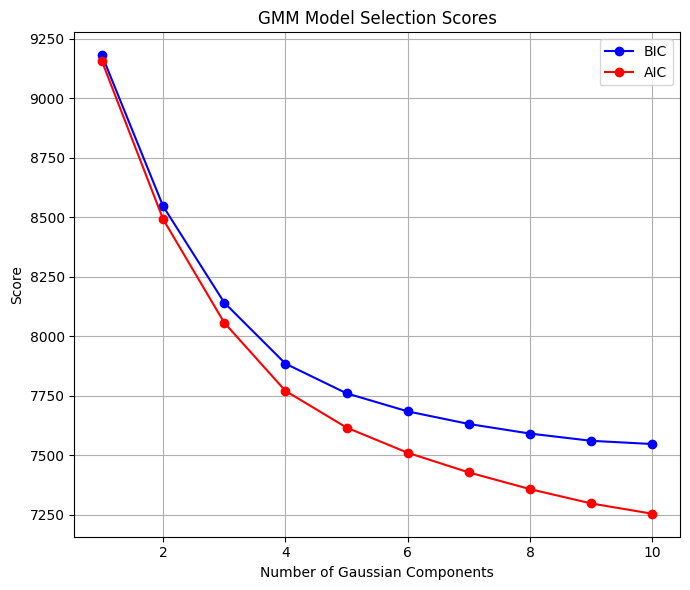

In [61]:
# A comparison of the GMM results on the lower dimensional data and the higher dimensional data
# In this I actually selection 4 gaussian features, this is not the best fit
pipeline.compare_GMM(opt_metric='BIC', n_gauss_filter = 4, save_path = 'XD_Results/Galah/gallah_reducedGMM_8_6.pkl', display_full = True) 

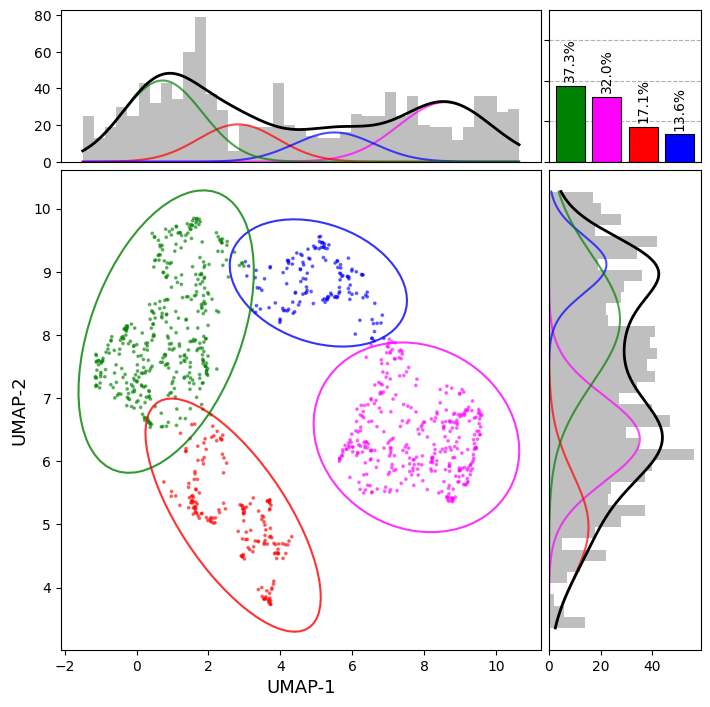

In [62]:
pipeline.plot_GMM_umap(z_score = 2.0, color_palette=["magenta", "red", "blue", "green"])

## As shown in notebook 4:
- The GMM preformance works very well on the UMAP projected structures - however how well does this corrospond to the high dimensional distributions?
- This is much more robust that the previous notebook as we run loads of initialisations and select the best case.

In [63]:
labels = {
    3: "GS/E",
    0: "Splash",
    1: "Aurora",
    2: "Eos",
}
summary_table = pipeline.table_results_GMM(labels)


Summary of GMM Components (from UMAP labels + weights)
+----+-------------+--------------+---------+-------------+--------------+-------------+--------------+--------------+--------------+-------------+-------------+-------------+-------------+-------------+--------------+-----------------------+
|    | Component   |   Weight (%) |   Count |   Count (%) | fe_h         | alpha_fe    | Na_fe        | Al_fe        | Mn_fe        | Y_fe        | Ba_fe       | Eu_fe       | Mg_Cu       | Mg_Mn       | Ba_Eu        | Energy                |
+====+=============+==============+=========+=============+==============+=============+==============+==============+==============+=============+=============+=============+=============+=============+==============+=======================+
|  0 | GS/E        |         37.3 |     399 |        37.6 | -0.96 ± 0.20 | 0.11 ± 0.08 | -0.27 ± 0.12 | -0.15 ± 0.15 | -0.36 ± 0.12 | 0.08 ± 0.17 | 0.39 ± 0.21 | 0.47 ± 0.14 | 0.61 ± 0.10 | 0.46 ± 0.14 | -0.09 ± 0.2

## Results:
- Overall we show really strong agreement with overall success of results, however we overall the uncertainty of these results is slightly greater 
- This is expected as we have been unable to consider the the errors in the data as we cannot propogate them formated into the lower dimensionality (although this could be a future large scale work - creating a package for dimensionality reduction with error propogation natively brought in)
- It has not been able to identify a background population which can either been seen as a positive or a negetive - in reality there should be a background population as there are smaller negligible contributions in this sample size that are not from one of our four contributons

## Suggestion of how to exploit in future research
- GMM is intrinsicly sensitive to initialisation 
- This becomes a more difficult problem for larger sample sizes and higher dimensions
- However i just the UMAP clustering can be used to define sensible initialisations and then full error aware expectation maximisation can be applied to the high dimensional space to achieve 'more complete` results.

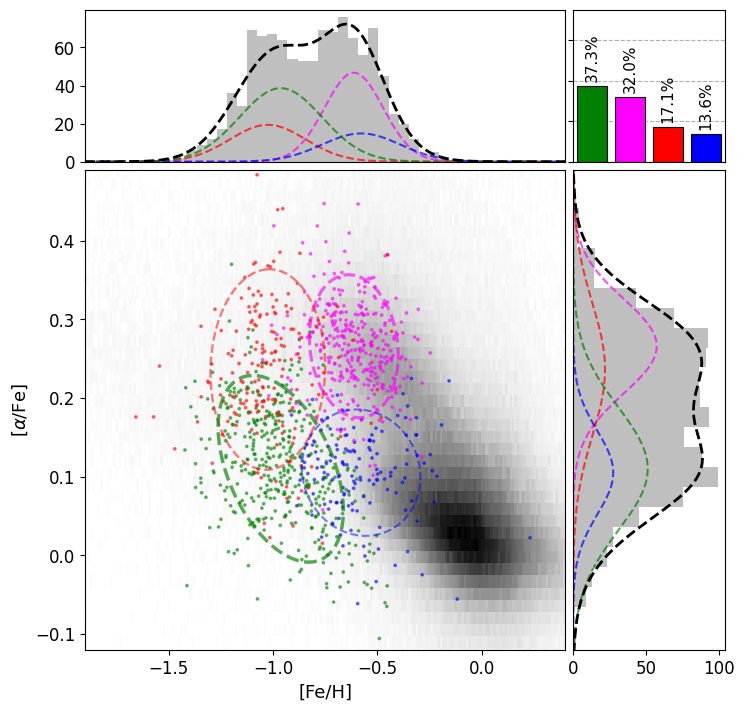

In [64]:
pipeline.plot_highdim_gaussian(x_key = 'fe_h', y_key='alpha_fe', 
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["magenta", "red", "blue", "green"], 
    xlim = (-1.9, 0.4), ylim=(-0.12, 0.49),
)

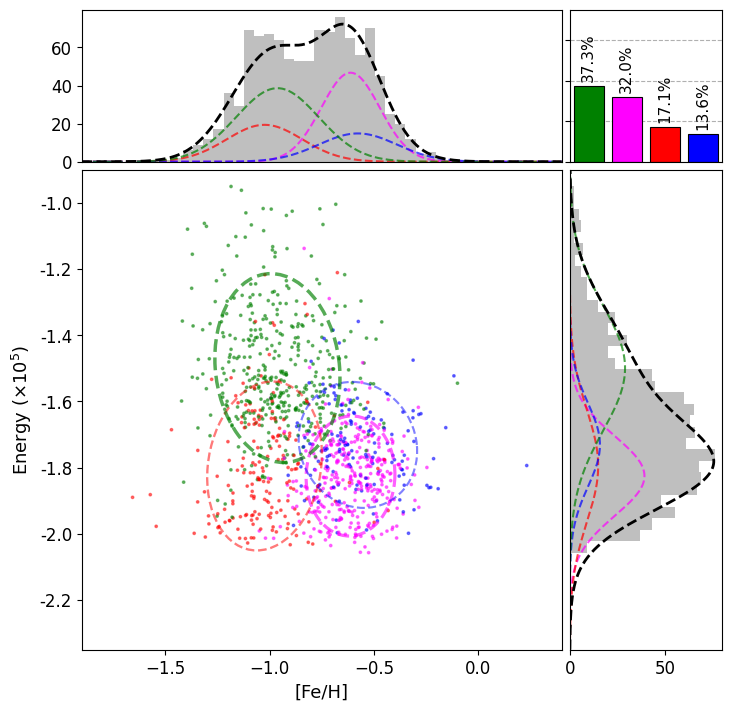

In [65]:
pipeline.plot_highdim_gaussian( x_key = 'fe_h', y_key='Energy',
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["magenta", "red", "blue", "green"], 
    xlim = (-1.9, 0.4), ylim=(-2.35e5, -0.9e5),
)

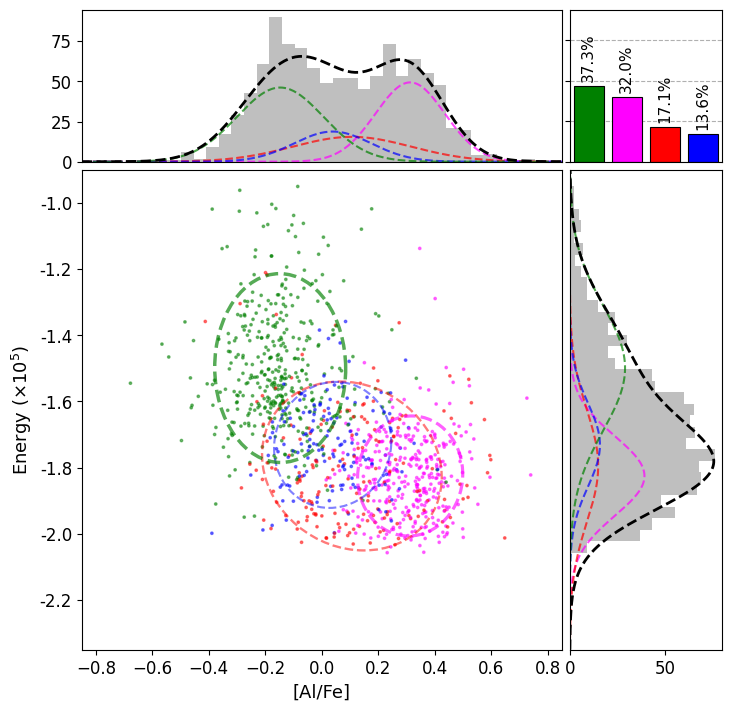

In [66]:
pipeline.plot_highdim_gaussian( x_key = 'Al_fe', y_key='Energy',
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["magenta", "red", "blue", "green"], 
    xlim = (-0.85, 0.85), ylim=(-2.35e5, -0.9e5),
)

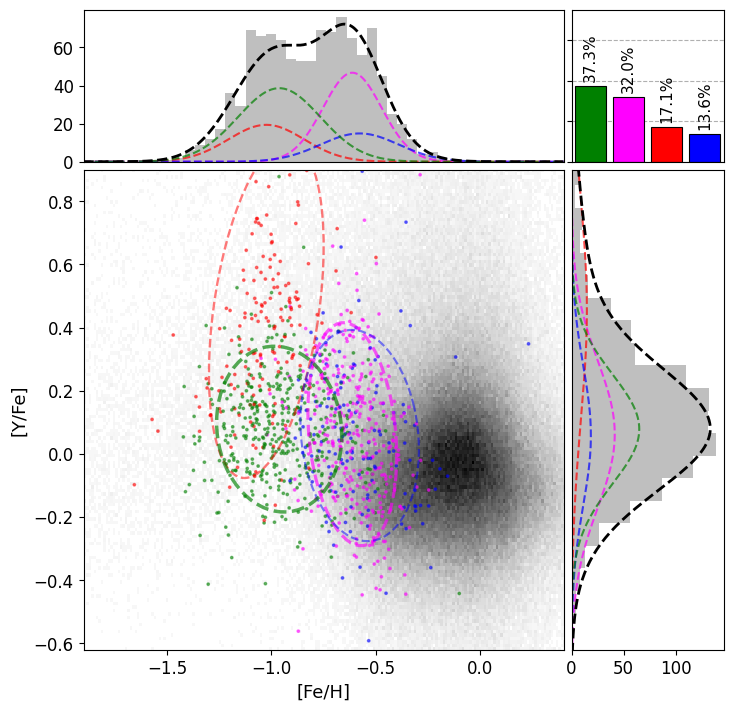

In [67]:
pipeline.plot_highdim_gaussian( x_key = 'fe_h', y_key='Y_fe',
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["magenta", "red", "blue", "green"], 
    xlim = (-1.9, 0.4), ylim=(-0.62, 0.9),
)

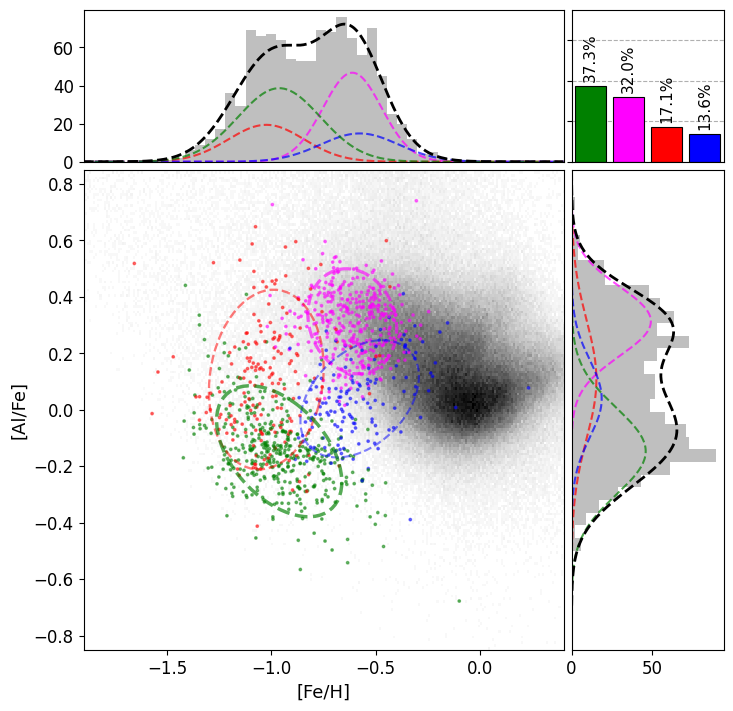

In [68]:
pipeline.plot_highdim_gaussian(x_key = 'fe_h', y_key='Al_fe', 
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["magenta", "red", "blue", "green"], 
    xlim = (-1.9, 0.4), ylim=(-0.85, 0.85),
)

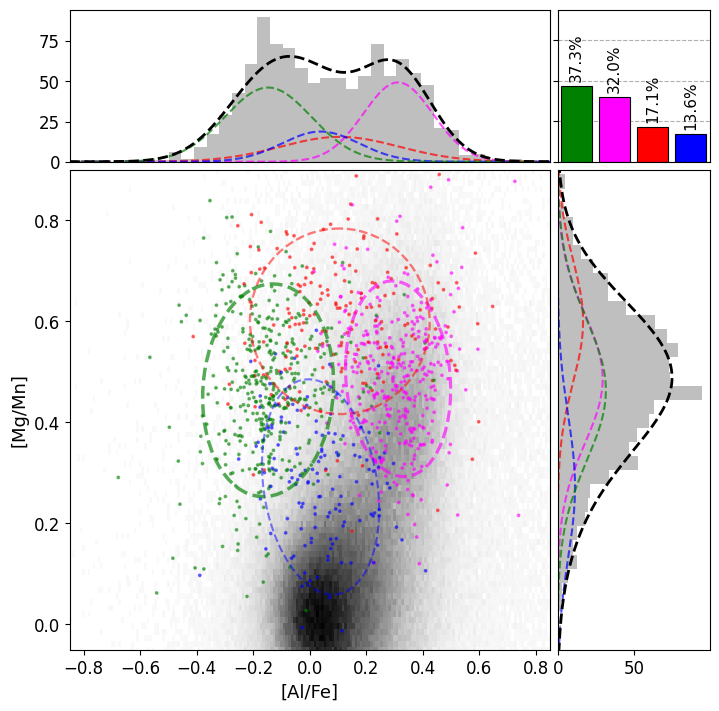

In [69]:
pipeline.plot_highdim_gaussian( x_key = 'Al_fe', y_key='Mg_Mn',
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["magenta", "red", "blue", "green"], 
    xlim =(-0.85, 0.85), ylim=(-0.05, 0.9),
)

## **Exploring higher number of gaussians:** 5 Gausians
### **2 Splash Populations**

 The following filters were applied: {'n_gauss': 5}
 Best BIC Score from filtered inputs: 7760.7577 occurred at:
   - Gaussian Components (n_gauss): 5


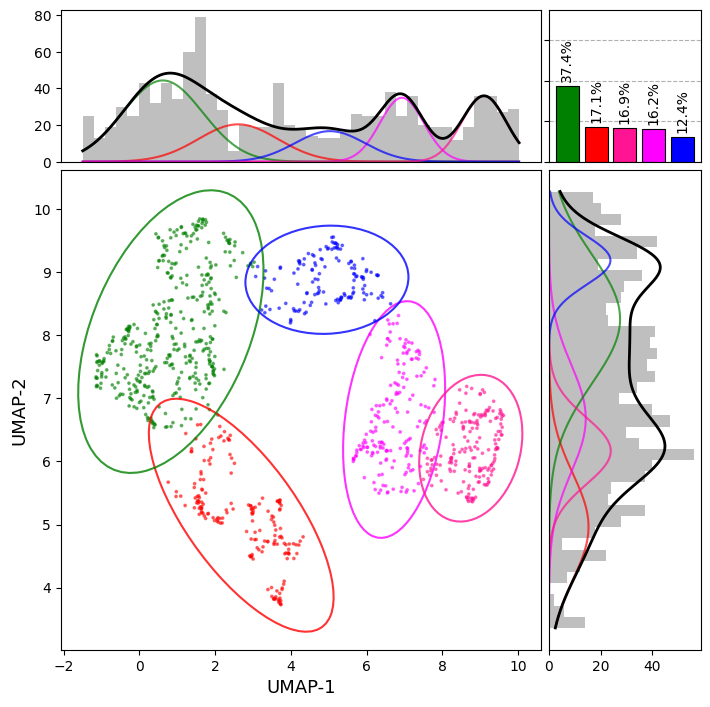

In [70]:
pipeline.compare_GMM(opt_metric='BIC', n_gauss_filter = 5, save_path = 'XD_Results/Galah/gallah_reducedGMM_8_6.pkl', display_full = False) 
pipeline.plot_GMM_umap(z_score = 2.0, color_palette=["red", "magenta", "green", "blue", 'deeppink'])

In [71]:
labels = {
    2: "GS/E",
    1: "Splash 1",
    4: "Splash 2",
    0: "Aurora",
    3: "Eos",
}

summary_table = pipeline.table_results_GMM(labels, combine = [[1,4]], labels_combined= ['Splash'])


Summary of GMM Components (from UMAP labels + weights)
+----+-------------+--------------+---------+-------------+--------------+-------------+--------------+--------------+--------------+-------------+-------------+-------------+-------------+-------------+--------------+-----------------------+
|    | Component   |   Weight (%) |   Count |   Count (%) | fe_h         | alpha_fe    | Na_fe        | Al_fe        | Mn_fe        | Y_fe        | Ba_fe       | Eu_fe       | Mg_Cu       | Mg_Mn       | Ba_Eu        | Energy                |
+====+=============+==============+=========+=============+==============+=============+==============+==============+==============+=============+=============+=============+=============+=============+==============+=======================+
|  0 | GS/E        |         37.4 |     399 |        37.6 | -0.96 ± 0.20 | 0.11 ± 0.08 | -0.27 ± 0.12 | -0.15 ± 0.15 | -0.36 ± 0.12 | 0.08 ± 0.17 | 0.39 ± 0.21 | 0.47 ± 0.14 | 0.61 ± 0.10 | 0.46 ± 0.14 | -0.09 ± 0.2

# **Observations from this:**
- Here we see the clustering algorithm has split Splash population into two population 
- They are very similiar in all elements other than their Y and Ba dsitributions with the splash 1 having a higher contribution of both than splash 2
- They are shown below in a new colour scheme to enhance their visualisation

## **We try and investigate the independence of these populations**
## **Adopt a new (similiar) colour scheme to help disitinguish between them and neglect constant populations.**

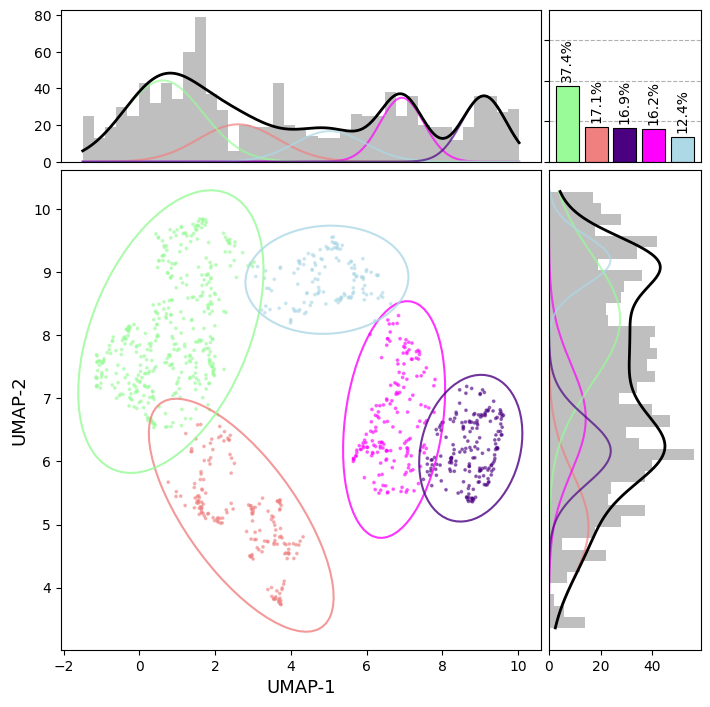

In [72]:
pipeline.plot_GMM_umap(z_score = 2.0, color_palette=["lightcoral", "magenta", "palegreen", "lightblue", 'indigo'])

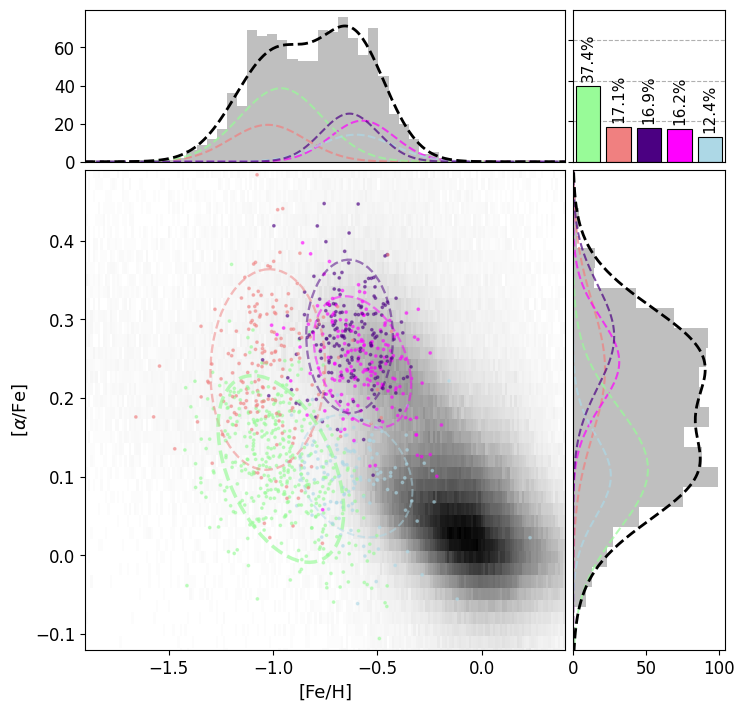

In [73]:
pipeline.plot_highdim_gaussian(x_key = 'fe_h', y_key='alpha_fe', 
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["lightcoral", "magenta", "palegreen", "lightblue", 'indigo'],
    xlim = (-1.9, 0.4), ylim=(-0.12, 0.49),
)

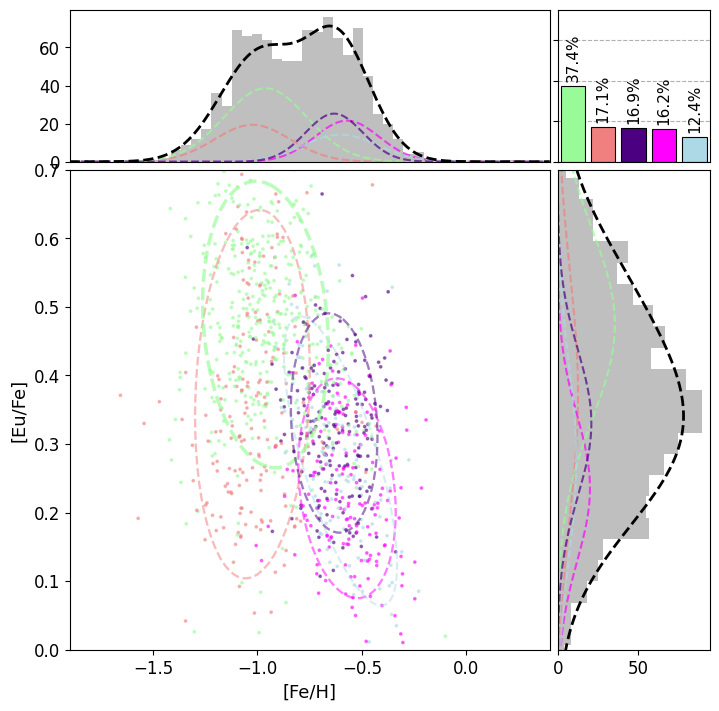

In [74]:
pipeline.plot_highdim_gaussian(x_key = 'fe_h', y_key='Eu_fe', 
    z_score = 1,
    # full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["lightcoral", "magenta", "palegreen", "lightblue", 'indigo'],
    xlim = (-1.9, 0.4), ylim=(0, 0.7),
)

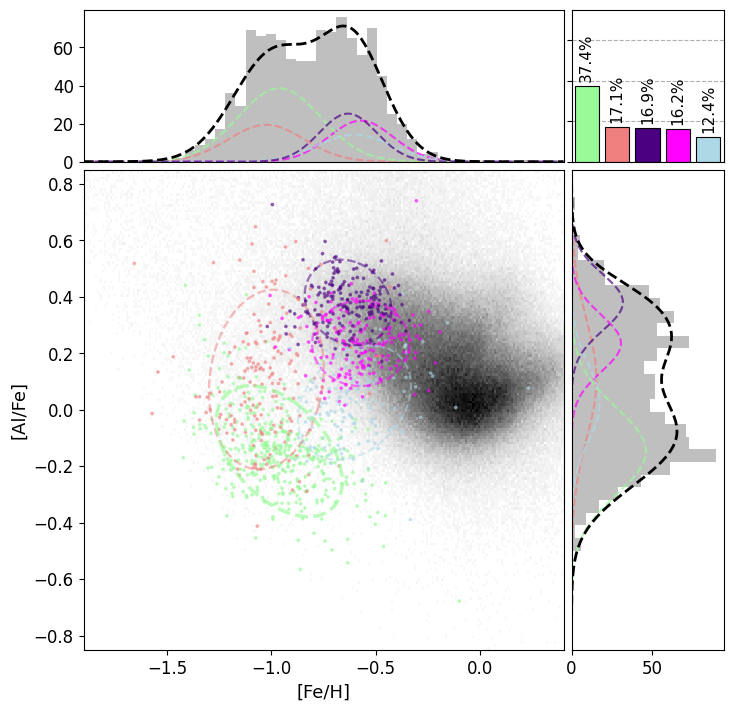

In [75]:
pipeline.plot_highdim_gaussian(x_key = 'fe_h', y_key='Al_fe', 
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["lightcoral", "magenta", "palegreen", "lightblue", 'indigo'],
    xlim = (-1.9, 0.4), ylim=(-0.85, 0.85),
)

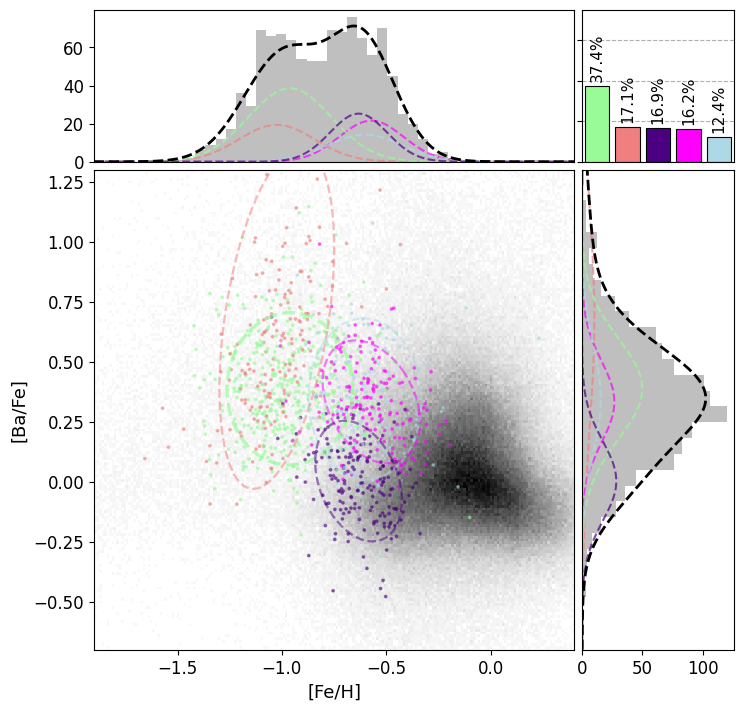

In [76]:
pipeline.plot_highdim_gaussian(x_key = 'fe_h', y_key='Ba_fe',
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["lightcoral", "magenta", "palegreen", "lightblue", 'indigo'],
    xlim =(-1.9, 0.4), ylim=(-0.7, 1.3),
)

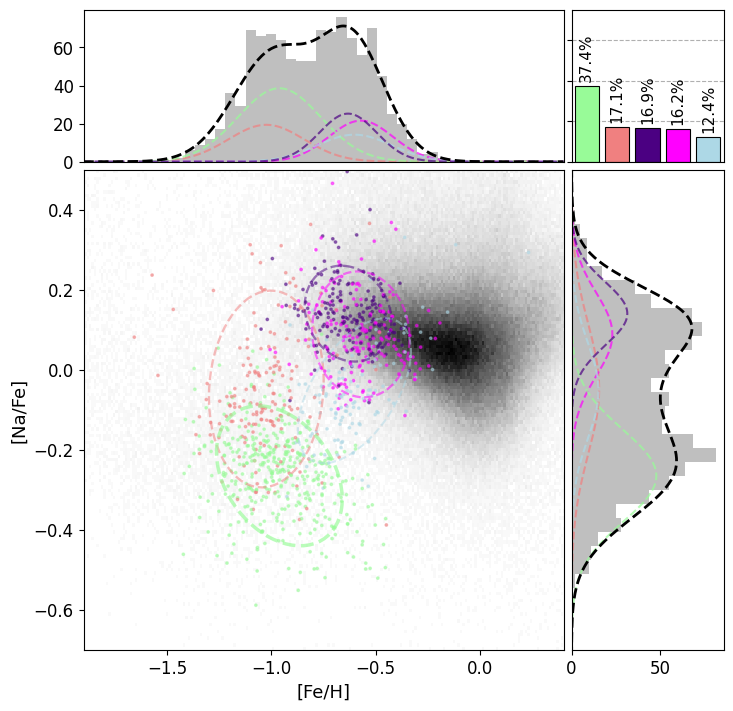

In [77]:
pipeline.plot_highdim_gaussian(x_key = 'fe_h', y_key='Na_fe',
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["lightcoral", "magenta", "palegreen", "lightblue", 'indigo'],
    xlim =(-1.9, 0.4), ylim=(-0.7, 0.5),
)

## Distinction between the two Splash Populations

- It is really intresting to investigate the meaningful seperation of these two populations

| Feature                  | Splash 1     | Splash 2 |
|--------------------------|----------------------------------|----------------------------|
| Colour     | Magenta                 | Purple                   |
| Fraction     | 16.2%                 | 16.9%                   |
| [Fe/H] (Metallicity)     | Similar overall                 | Similar overall                |
| [α/Fe]                  | Slightly higher                 | Slightly lower                 |
| [Na/Fe]                 | Slightly higher                 | Slightly lower                 |
| [Eu/Fe]                 | Higher                          | Lower                          |
| [Al/Fe]                 | Higher                          | Lower                          |
| [Ba/Fe]                 | Significantly lower             | Significantly higher           |


## **Exploring higher number of gaussians:** 6 Gaussians
- Here we recover the idea produced by APOGEE dataset of the division of the GS/E merger into a lower and higher metalicity populations
- We must verify that this split is actually follwing this rather than arbitary split into two along another 'axis'.
- This was not achievable in the Galah dataset: ie adding more poopulations just added more background populations and actually shows an advantage of preforming clusters in the lower dimensional space
- We still have this split in Splash

 The following filters were applied: {'n_gauss': 6}
 Best BIC Score from filtered inputs: 7684.8467 occurred at:
   - Gaussian Components (n_gauss): 6


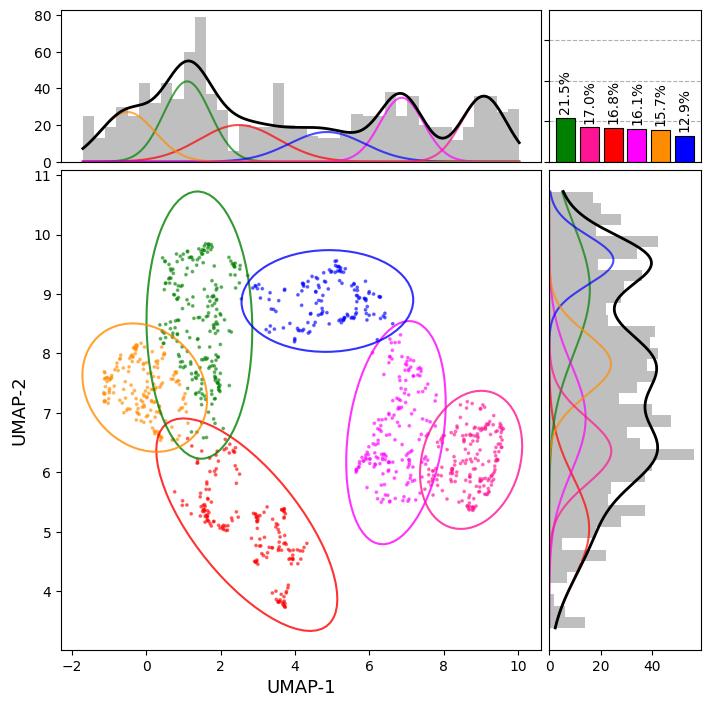

In [78]:
pipeline.compare_GMM(opt_metric='BIC', n_gauss_filter = 6, save_path = 'XD_Results/Galah/gallah_reducedGMM_8_6.pkl', display_full = False) 
pipeline.plot_GMM_umap(z_score = 2.0, color_palette=["red", "green", "magenta", "blue", 'darkorange', 'deeppink'])

In [79]:
labels = {
    1: "GS/E 1",
    4: "GS/E 2",
    2: "Splash 1",
    5: "Splash 2",
    0: "Aurora",
    3: "Eos",
}

summary_table = pipeline.table_results_GMM(labels, combine = [[1,4], [2,5]], labels_combined= ['GS/E','Splash'])


Summary of GMM Components (from UMAP labels + weights)
+----+-------------+--------------+---------+-------------+--------------+-------------+--------------+--------------+--------------+-------------+-------------+-------------+-------------+-------------+--------------+-----------------------+
|    | Component   |   Weight (%) |   Count |   Count (%) | fe_h         | alpha_fe    | Na_fe        | Al_fe        | Mn_fe        | Y_fe        | Ba_fe       | Eu_fe       | Mg_Cu       | Mg_Mn       | Ba_Eu        | Energy                |
+====+=============+==============+=========+=============+==============+=============+==============+==============+==============+=============+=============+=============+=============+=============+==============+=======================+
|  0 | GS/E 1      |         21.5 |     226 |        21.3 | -0.87 ± 0.18 | 0.10 ± 0.09 | -0.26 ± 0.13 | -0.16 ± 0.15 | -0.30 ± 0.11 | 0.08 ± 0.18 | 0.38 ± 0.21 | 0.47 ± 0.14 | 0.58 ± 0.10 | 0.38 ± 0.11 | -0.09 ± 0.2

## **Change of colour these for easier comparison of:**
- Splash 1 vs Splash 2
- GS/E 1 vs GS/E 2

## **Key Conclussion**
- These is remarkable comparsion between the GS/E 1 and GS/E 2 presented in the [Apogee High Dimensional Clustering Notebook](1_apogee_scaled_pipeline.ipynb) and the ones presented in this notebook
- This adds potential additional astrophysical validity to the split between the splash population presented.

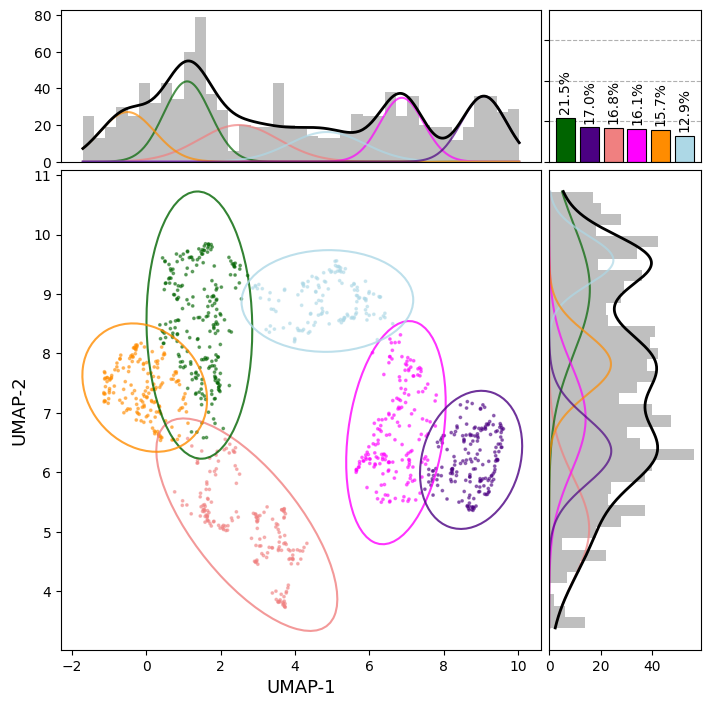

In [80]:
pipeline.plot_GMM_umap(z_score = 2.0, color_palette=["lightcoral", "darkgreen", "magenta", "lightblue", "darkorange", "indigo"])

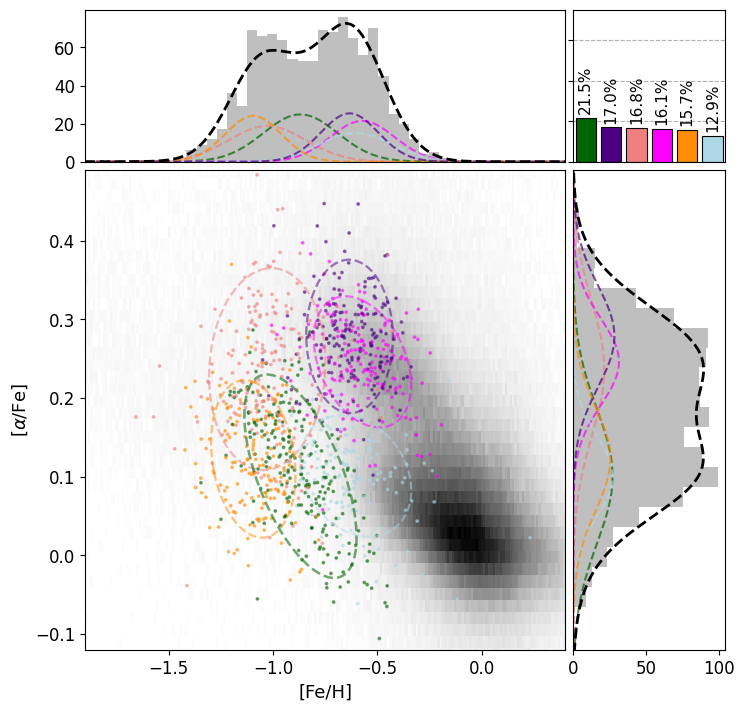

In [81]:
pipeline.plot_highdim_gaussian(x_key = 'fe_h', y_key='alpha_fe', 
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["lightcoral", "darkgreen", "magenta", "lightblue", "darkorange", "indigo"], 
    xlim = (-1.9, 0.4), ylim=(-0.12, 0.49),
)

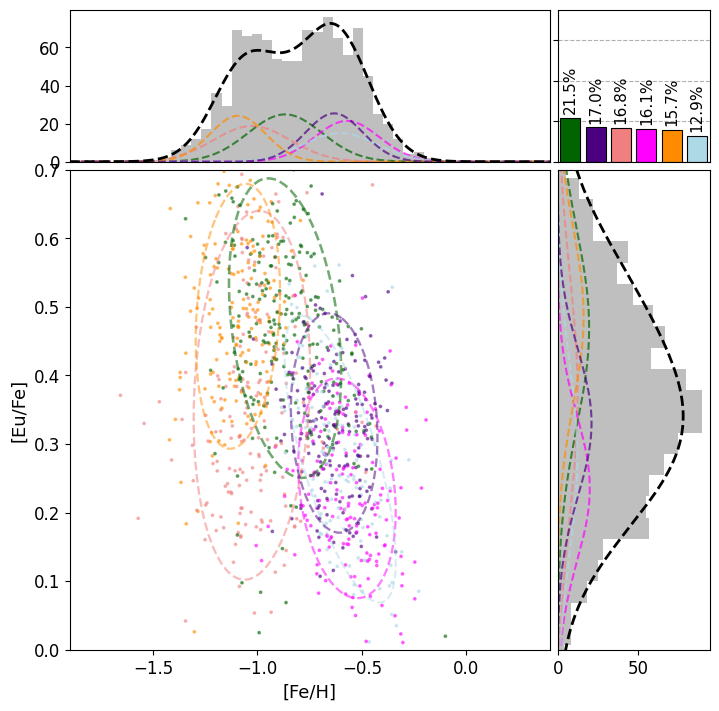

In [82]:
pipeline.plot_highdim_gaussian(x_key = 'fe_h', y_key='Eu_fe', 
    z_score = 1,
    # full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["lightcoral", "darkgreen", "magenta", "lightblue", "darkorange", "indigo"], 
    xlim = (-1.9, 0.4), ylim=(0, 0.7),
)

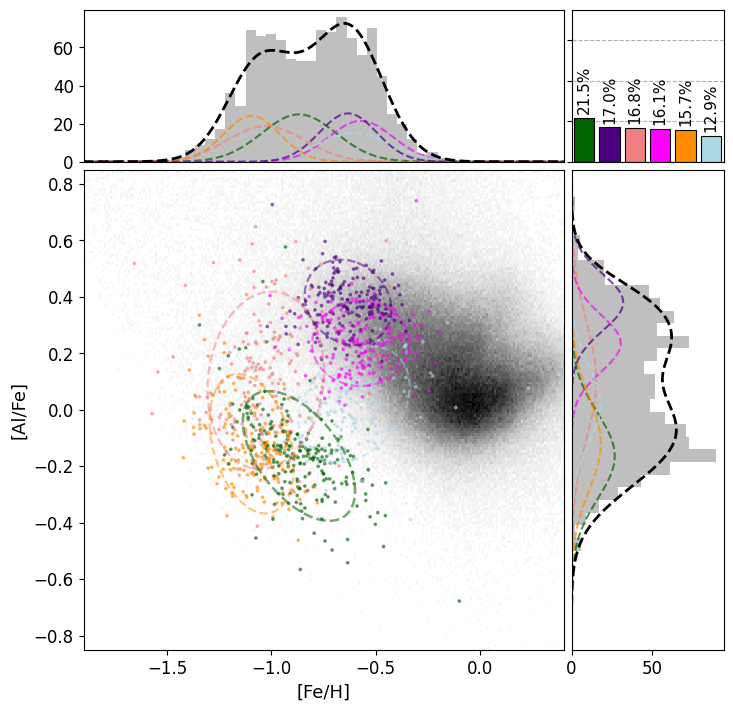

In [83]:
pipeline.plot_highdim_gaussian(x_key = 'fe_h', y_key='Al_fe', 
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["lightcoral", "darkgreen", "magenta", "lightblue", "darkorange", "indigo"], 
    xlim = (-1.9, 0.4), ylim=(-0.85, 0.85),
)

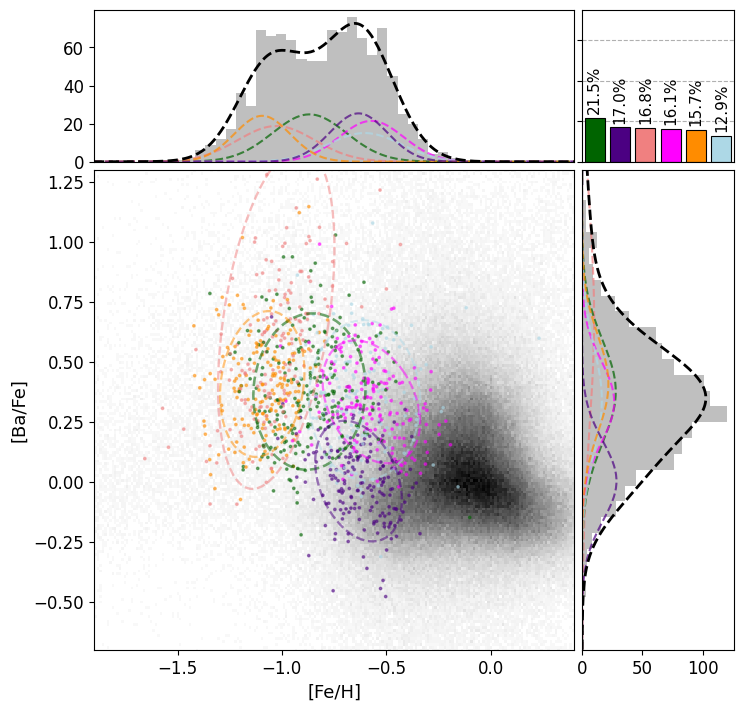

In [84]:
pipeline.plot_highdim_gaussian(x_key = 'fe_h', y_key='Ba_fe',
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["lightcoral", "darkgreen", "magenta", "lightblue", "darkorange", "indigo"], 
    xlim =(-1.9, 0.4), ylim=(-0.7, 1.3),
)

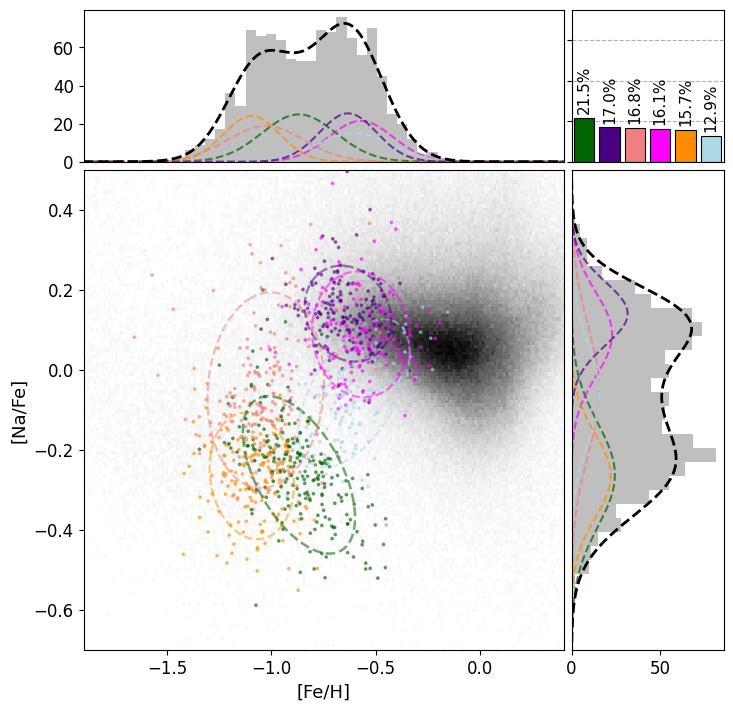

In [85]:
pipeline.plot_highdim_gaussian(x_key = 'fe_h', y_key='Na_fe',
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["lightcoral", "darkgreen", "magenta", "lightblue", "darkorange", "indigo"], 
    xlim =(-1.9, 0.4), ylim=(-0.7, 0.5),
)

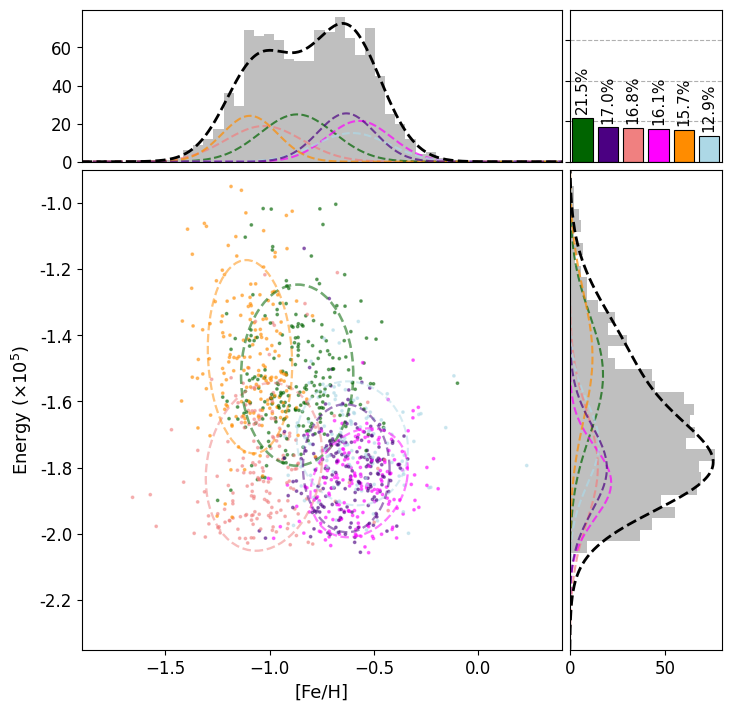

In [86]:
pipeline.plot_highdim_gaussian( x_key = 'fe_h', y_key='Energy',
    z_score = 1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["lightcoral", "darkgreen", "magenta", "lightblue", "darkorange", "indigo"], 
    xlim = (-1.9, 0.4), ylim=(-2.35e5, -0.9e5),
)

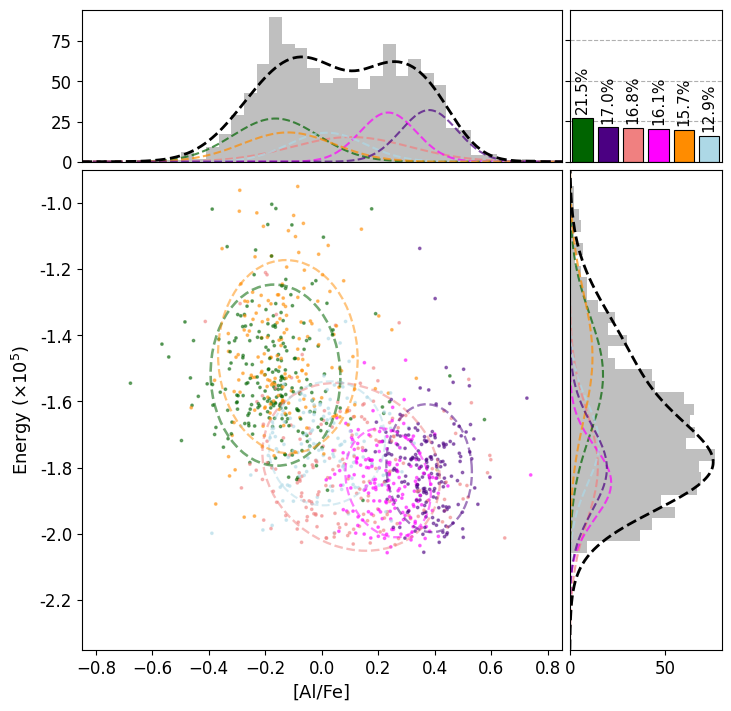

In [87]:
pipeline.plot_highdim_gaussian(  x_key = 'Al_fe', y_key='Energy',
    z_score=1,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["lightcoral", "darkgreen", "magenta", "lightblue", "darkorange", "indigo"], 
    xlim = (-0.85, 0.85), ylim=(-2.35e5, -0.9e5),
)